Part 1

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/CS345/adult.csv')
train = pd.read_csv('/content/drive/MyDrive/CS345/adult_train.txt')
test = pd.read_csv('/content/drive/MyDrive/CS345/adult_test.txt')

X_train = train.drop(columns=['target'])
y_train = train['target']
X_test = test.drop(columns=['target'])
y_test = test['target']

In [3]:
from sklearn.feature_extraction import DictVectorizer

train_dict = X_train.to_dict(orient='records')
test_dict = X_test.to_dict(orient='records')

dv = DictVectorizer()
X_train_encoded = dv.fit_transform(train_dict)
X_test_encoded = dv.transform(test_dict)

Part 2

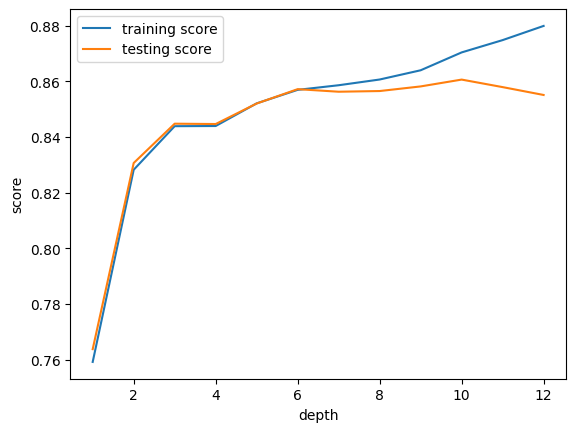

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

train_score = []
test_score= []
depths = range(1, 13)

for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf.fit(X_train_encoded, y_train)

    train_score.append(accuracy_score(y_train, clf.predict(X_train_encoded)))
    test_score.append(accuracy_score(y_test, clf.predict(X_test_encoded)))

plt.plot(depths, train_score, label='training score')
plt.plot(depths, test_score, label='testing score')
plt.xlabel('depth')
plt.ylabel('score')
plt.legend()
plt.show()

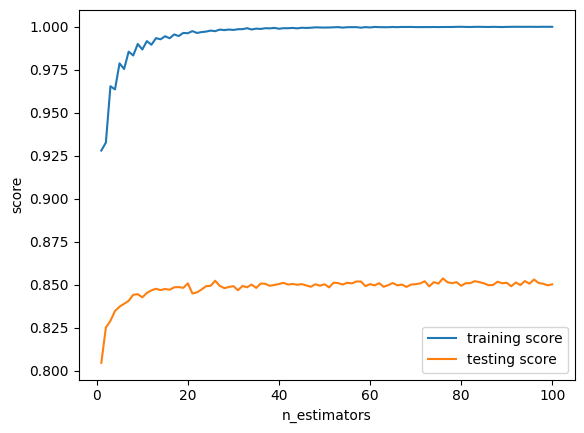

In [5]:
from sklearn.ensemble import RandomForestClassifier

train_score = []
test_score= []
estimators = range(1, 101)

for n in estimators :
    rf = RandomForestClassifier(n_estimators = n , n_jobs = -1)
    rf.fit(X_train_encoded, y_train)

    train_score.append(accuracy_score(y_train, rf.predict(X_train_encoded)))
    test_score.append(accuracy_score(y_test, rf.predict(X_test_encoded)))

plt.plot(estimators, train_score, label='training score')
plt.plot(estimators, test_score, label='testing score')
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.legend()
plt.show()

3.1 ต่างกัน เพราะ tree แต่ละต้นของ Random Forest จะทำ Bootstrapping ในการสุ่มข้อมูลมาใช้ในแต่ล่ะ tree ซึ่งจะทำให้ tree แต่ล่ะต้นมีกลุ่มตัวอย่างไม่ซ้ำกัน ดังนั้นถ้ามี tree แค่ต้นเดียวจะทำให้กลุ่มตัวอย่างที่มี มีข้อมูลไม่ครบจนทำให้ตัดสินใจได้แย่กว่า Decision Tree ที่ใช้ข้อมูลทั้งหมด

3.2 เพิ่มขึ้น แต่เมื่อถึงจุดๆ หนึ่ง score ที่ได้เริ่มคงที่เหมือนถึงจุดอิ่มตัว

Part 3

In [6]:
import numpy as np

importances = rf.feature_importances_
features = dv.get_feature_names_out()

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': np.round(importances, 4)
}).sort_values(by='Importance', ascending=False)

importance_df

,Feature,Importance
20,fnlwgt,0.1640
0,age,0.1489
1,capital-gain,0.0950
21,hours-per-week,0.0841
3,education-num,0.0600
...,...,...
57,native-country=Outlying-US(Guam-USVI-etc),0.0000
102,workclass=Never-worked,0.0000
45,native-country=Honduras,0.0000
44,native-country=Holand-Netherlands,0.0000


feature ที่่สำคัญ 3 อันดับแรก คือ fnlwgt (Final Weight), age และ capital-gain ซึ่ง fnlwgt คือเงินเดือนล่าสุด ยิ่งสูงยิ่งมีโอกาศที่รายได้ต่อปีเกิน 50,000 ส่วน age ก็คล้ายๆ fnlwgt ยิ่งอายุมากยิ่งมีอายุการทำงานมาก ซึ่งหมายถึงคนๆ นั้นอาจจะมีตำแหน่งงานสูงๆ จากการเลื่อนขั้น หรือได้รับการขึ้นเงินเดือน ส่วน capital-gain คือกำไรจากการขายสินทรัพย์ ถ้าเขาสามารถทำกำไรจากการขายได้มาก ก็แปลว่าเขามีรายได้สุทธิมากตามไปด้วย